<a href="https://colab.research.google.com/github/bishalgupta1997/BigMart-Item_Outlet_Sales-/blob/master/Big_Mart_Item_Outlet_Sales_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The Project is about predictive analytics.BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.The problem statement is to predict the sales of each product at a particular store.The dataset has two parts:Training and Test.The training 8523 observations and the Test set has 5681 observations.We need to predict the sales for test set.

#Step 1
Import libray
#Step 2
Import Dataset
#Step 3
Data Exploration
#Step 4
Data Cleaning
#Step 5
Data Preprocessing
#Step 6
Data Modeling


In [0]:
#import the needed libray
#Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib
import warnings 
from scipy.stats import mode 
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
#import the dataset 
train = pd.read_csv("Train.csv") 

#Data Exploration

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
#describe the values(like mean,median etc)of the numeric column
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
#check for the duplicates value
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

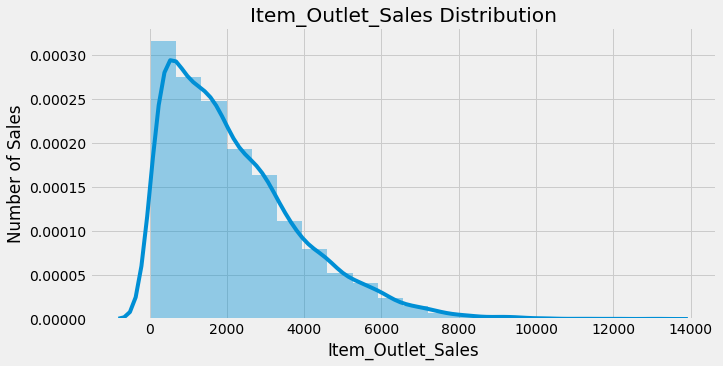

In [7]:
#plot a diagram to shaw the sales rate of Item_Outlet_Sales
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
sns.distplot(train.Item_Outlet_Sales, bins = 20)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [8]:
#Print the skew and kurtosis value
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [0]:
categorical_columns = [x for x in train.dtypes.index if train.dtypes[x]=='object']

In [0]:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [13]:
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (train[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

In [0]:
item_avg_weight = train.pivot_table(values='Item_Weight', index='Item_Identifier')

In [0]:
outlet_size_mode = train.pivot_table(values="Outlet_Size", columns="Outlet_Type",aggfunc=lambda x:x.mode())

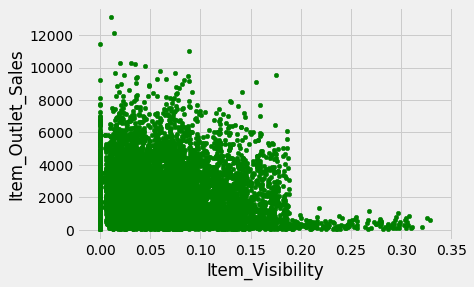

In [16]:
train.plot(kind='scatter',x='Item_Visibility',y='Item_Outlet_Sales',color='green')
plt.show()

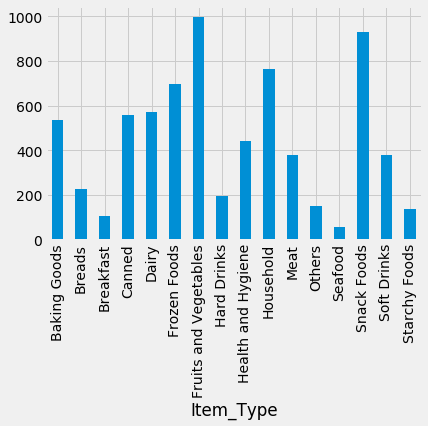

In [17]:
train.groupby('Item_Type')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

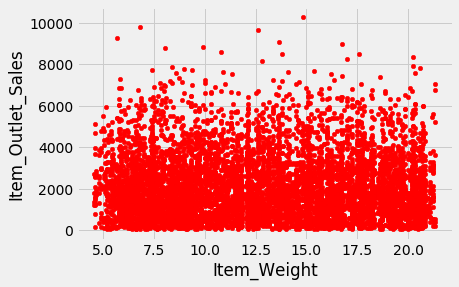

In [18]:
train.plot(kind='scatter',x='Item_Weight',y='Item_Outlet_Sales',color='red')
plt.show()

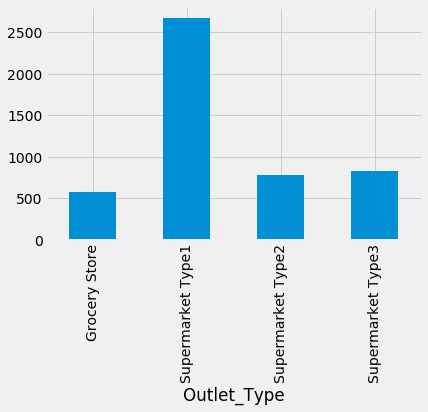

In [19]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

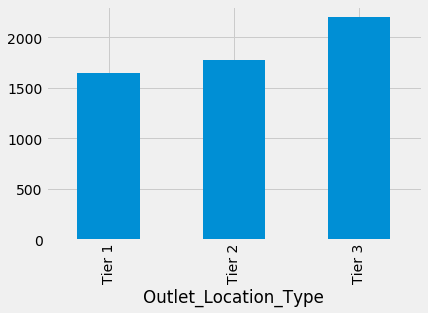

In [20]:
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

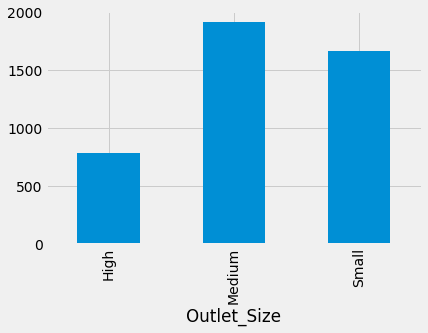

In [21]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

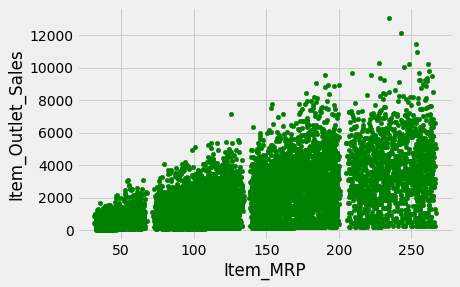

In [22]:
train.plot(kind='scatter',x='Item_MRP',y='Item_Outlet_Sales',color='green')
plt.show()

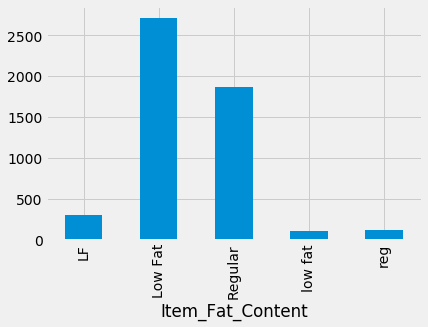

In [23]:
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].nunique().plot(kind='bar')
plt.show()

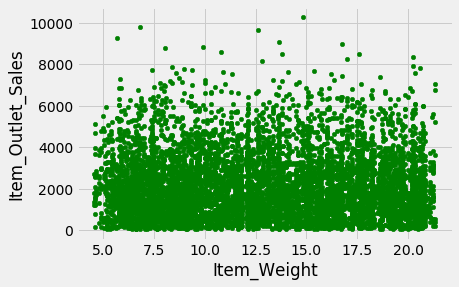

In [24]:
train.plot(kind='scatter',x='Item_Weight',y='Item_Outlet_Sales',color='green')
plt.show()

In [25]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#Data Cleaning

In [0]:
miss_bool = train['Item_Weight'].isnull()

In [40]:
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [0]:
X= train.iloc[:, :-1].values
Y= train.iloc[:, :12].values

In [206]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [0]:
imputer= SimpleImputer(missing_values='nan',strategy='mean')

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [0]:
labelencoder_X=LabelEncoder()

In [0]:
X[:, 4]=labelencoder_X.fit_transform(X[:, 4])

In [0]:
onehotencoder=OneHotEncoder(categorical_features=[4])

In [0]:
labelencoder_y=LabelEncoder()

In [217]:
y=labelencoder_y.fit_transform(y)

ValueError: ignored

In [0]:
train["Item_Weight"].fillna(0, inplace=True)

In [0]:
del train['Item_Identifier']

In [0]:
del train['Outlet_Identifier']

In [46]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,0.000,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#Data Preprocessing

In [0]:
imputer= SimpleImputer(missing_values='nan',strategy='mean')

In [63]:
SimpleImputer(copy=True, fill_value=None,missing_values='nan', strategy='mean', verbose=0)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values='nan', strategy='mean', verbose=0)

In [64]:
train.loc[:,"Outlet_Size"].mode()

0    Medium
dtype: object

In [0]:
train["Outlet_Size"].fillna("Medium",inplace= True)

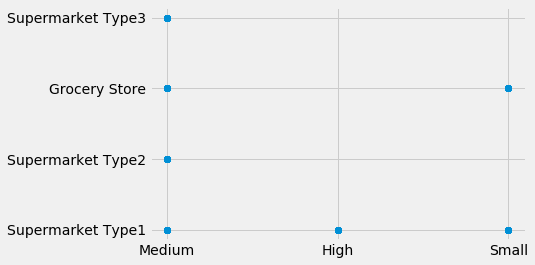

In [66]:
plt.scatter(train['Outlet_Size'],train['Outlet_Type'])
plt.show()

In [67]:
twowaytable=pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
twowaytable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,555,2785,928,935
Small,528,1860,0,0


In [0]:
#From above plot and table we can assume that Glacceray shops are of small size
#SO map Glocessary Shop and Size
d={'Grocery Store':'Small'}
s=train.Outlet_Type.map(d)
train.Outlet_Size=train.Outlet_Size.combine_first(s)

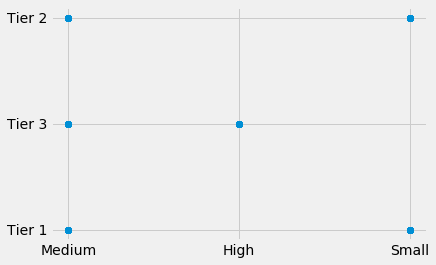

In [69]:
plt.scatter(train['Outlet_Size'],train['Outlet_Location_Type'])
plt.show()

In [70]:
twowaytable=pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])
twowaytable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [0]:
#From plot and table we conclude that Tier 2 is of size small .
#So map Tier 2 and Size
d={'Tier 2':'Small'}
s=train.Outlet_Location_Type.map(d)
train.Outlet_Size=train.Outlet_Size.combine_first(s)

In [0]:
d={'Tier 2':'Small'}
s=train.Outlet_Location_Type.map(d)
train.Outlet_Size=train.Outlet_Size.combine_first(s)

In [73]:
train.Outlet_Size.isnull().any()

False

In [0]:
#Fill missing values of weight of Item According to means of Item Identifier
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [76]:
train.Item_Weight.isnull().sum()

4

In [0]:
#fill Item_Weigth by their corresponding Item_Type
List=['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']
Mean_values_Item_Type_train=train.groupby('Item_Type')['Item_Weight'].mean()
for i in List:
    d={i:Mean_values_Item_Type_train[i]}
    s=train.Item_Type.map(d)
    train.Item_Weight=train.Item_Weight.combine_first(s)
Mean_values_Item_Type_train=train.groupby('Item_Type')['Item_Weight'].mean()

In [78]:
train.Item_Weight.isnull().any()

False

In [79]:
train.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [80]:
#From above observations their are many zeros for item_Visiblity which not possible so 
#fill by corresponding means of Item_Identifiers
#first fill by nam for simplicity
train['Item_Visibility'].replace(0,np.nan)
train['Item_Visibility'].fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
5       0.000000
6       0.012741
7       0.127470
8       0.016687
9       0.094450
10      0.000000
11      0.045464
12      0.100014
13      0.047257
14      0.068024
15      0.069089
16      0.008596
17      0.069196
18      0.034238
19      0.102492
20      0.138190
21      0.035400
22      0.025698
23      0.057557
24      0.025896
25      0.099887
26      0.066693
27      0.019356
28      0.161467
29      0.072222
          ...   
8493    0.025886
8494    0.000000
8495    0.029567
8496    0.021696
8497    0.049209
8498    0.035293
8499    0.037574
8500    0.000000
8501    0.005998
8502    0.070712
8503    0.036133
8504    0.124111
8505    0.094146
8506    0.084676
8507    0.030242
8508    0.043246
8509    0.214306
8510    0.056862
8511    0.026980
8512    0.042801
8513    0.020407
8514    0.054489
8515    0.021518
8516    0.118661
8517    0.083607
8518    0.056783
8519    0.046982
8520    0.0351

In [81]:
train['Item_Visibility'].fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
5       0.000000
6       0.012741
7       0.127470
8       0.016687
9       0.094450
10      0.000000
11      0.045464
12      0.100014
13      0.047257
14      0.068024
15      0.069089
16      0.008596
17      0.069196
18      0.034238
19      0.102492
20      0.138190
21      0.035400
22      0.025698
23      0.057557
24      0.025896
25      0.099887
26      0.066693
27      0.019356
28      0.161467
29      0.072222
          ...   
8493    0.025886
8494    0.000000
8495    0.029567
8496    0.021696
8497    0.049209
8498    0.035293
8499    0.037574
8500    0.000000
8501    0.005998
8502    0.070712
8503    0.036133
8504    0.124111
8505    0.094146
8506    0.084676
8507    0.030242
8508    0.043246
8509    0.214306
8510    0.056862
8511    0.026980
8512    0.042801
8513    0.020407
8514    0.054489
8515    0.021518
8516    0.118661
8517    0.083607
8518    0.056783
8519    0.046982
8520    0.0351

In [82]:
train.Item_Visibility.isnull().any()

False

In [86]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,19.000,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [0]:
Item_Fat_Content={"Low Fat":0,"low fat":1,"Regular":2,"LF":3,"reg":4}

In [0]:
train.Item_Fat_Content = [Item_Fat_Content[item] for item in train.Item_Fat_Content]

In [0]:
Item_Type={"Dairy":0,"Soft Drinks":1,"Meat":2,"Fruits and Vegetables":3,
           "Household":4,"Baking Goods":5,"Snack Foods":6,"Frozen Foods":7,
           "Health and Hygiene":8,"Others":9,"Canned":10,"Breakfast":11,
           "Hard Drinks":12,"Breads":13,"Starchy Foods":14,"Seafood":15}

In [0]:
train.Item_Type = [Item_Type[item] for item in train.Item_Type]

In [0]:
Outlet_Size={"Medium":0,"High":1,"Low":2,"Small":4}

In [0]:
train.Outlet_Size = [Outlet_Size[item] for item in train.Outlet_Size]

In [0]:
Outlet_Location_Type={"Tier 1":1,"Tier 2":2,"Tier 3":3}

In [0]:
train.Outlet_Location_Type = [Outlet_Location_Type[item] for item in train.Outlet_Location_Type]

In [0]:
Outlet_Type={"Supermarket Type1":1,"Supermarket Type2":2,"Supermarket Type3":3,"Grocery Store":4}

In [0]:
train.Outlet_Type = [Outlet_Type[item] for item in train.Outlet_Type]

In [97]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [98]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,1,1,3735.1380
1,5.920,2,0.019278,1,48.2692,2009,0,3,2,443.4228
2,17.500,0,0.016760,2,141.6180,1999,0,1,1,2097.2700
3,19.200,2,0.000000,3,182.0950,1998,0,3,4,732.3800
4,8.930,0,0.000000,4,53.8614,1987,1,3,1,994.7052
5,10.395,2,0.000000,5,51.4008,2009,0,3,2,556.6088
6,13.650,2,0.012741,6,57.6588,1987,1,3,1,343.5528
7,19.000,0,0.127470,6,107.7622,1985,0,3,3,4022.7636
8,16.200,2,0.016687,7,96.9726,2002,0,2,1,1076.5986
9,19.200,2,0.094450,7,187.8214,2007,0,2,1,4710.5350


In [99]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

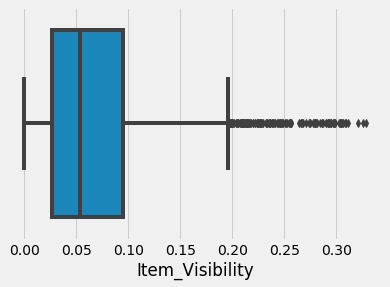

In [100]:
sns.boxplot(train['Item_Visibility'])

In [0]:
train["Item_Visibility"] = np.where(train["Item_Visibility"] >0.19, 0.19,train["Item_Visibility"])

In [102]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.065201
std         0.048563
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.190000
Name: Item_Visibility, dtype: float64

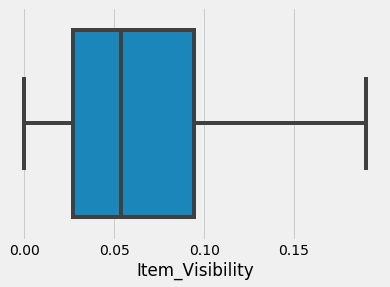

In [103]:
sns.boxplot(train['Item_Visibility'])

In [104]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,1,1,3735.1380
1,5.920,2,0.019278,1,48.2692,2009,0,3,2,443.4228
2,17.500,0,0.016760,2,141.6180,1999,0,1,1,2097.2700
3,19.200,2,0.000000,3,182.0950,1998,0,3,4,732.3800
4,8.930,0,0.000000,4,53.8614,1987,1,3,1,994.7052
5,10.395,2,0.000000,5,51.4008,2009,0,3,2,556.6088
6,13.650,2,0.012741,6,57.6588,1987,1,3,1,343.5528
7,19.000,0,0.127470,6,107.7622,1985,0,3,3,4022.7636
8,16.200,2,0.016687,7,96.9726,2002,0,2,1,1076.5986
9,19.200,2,0.094450,7,187.8214,2007,0,2,1,4710.5350


#Data Modeling

In [184]:
train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,0.857210,0.065201,5.550510,140.992782,1997.831867,1.230083,2.112871,1.709492,2181.288914
std,4.645016,1.089797,0.048563,3.566201,62.275067,8.371760,1.754861,0.812757,1.089985,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,1.000000,1.000000,33.290000
25%,8.785000,0.000000,0.026989,3.000000,93.826500,1987.000000,0.000000,1.000000,1.000000,834.247400
50%,12.650000,0.000000,0.053931,5.000000,143.012800,1999.000000,0.000000,2.000000,1.000000,1794.331000
75%,16.850000,2.000000,0.094585,7.000000,185.643700,2004.000000,4.000000,3.000000,2.000000,3101.296400
max,21.350000,4.000000,0.190000,15.000000,266.888400,2009.000000,4.000000,3.000000,4.000000,13086.964800


In [0]:
x= train.iloc[:, :10].values
y= train.iloc[:, :-1].values

In [0]:
regressor=LinearRegression()

In [189]:
regressor.fit(x_train,y_train)
plt.show

<function matplotlib.pyplot.show>

In [187]:
len(x) == len(y)

True

In [167]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [183]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,1999,0,1,1,3735.1380
1,5.920,2,0.019278,1,48.2692,2009,0,3,2,443.4228
2,17.500,0,0.016760,2,141.6180,1999,0,1,1,2097.2700
3,19.200,2,0.000000,3,182.0950,1998,0,3,4,732.3800
4,8.930,0,0.000000,4,53.8614,1987,1,3,1,994.7052
5,10.395,2,0.000000,5,51.4008,2009,0,3,2,556.6088
6,13.650,2,0.012741,6,57.6588,1987,1,3,1,343.5528
7,19.000,0,0.127470,6,107.7622,1985,0,3,3,4022.7636
8,16.200,2,0.016687,7,96.9726,2002,0,2,1,1076.5986
9,19.200,2,0.094450,7,187.8214,2007,0,2,1,4710.5350


ValueError: ignored

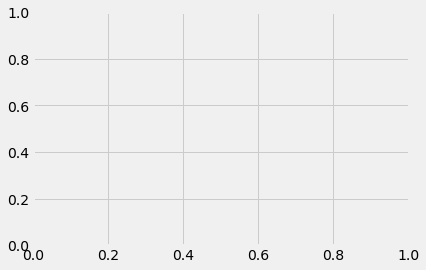

In [192]:
plt.scatter(x_train,y_train,color='red')